# Projet RO - Optimisation Hivernale
## **1.Présentation de l'énoncé**
Dans ce projet, nous allons comprendre comment optimiser le déneigement de la ville de Montréal.

Cette démonstration comporte 3 parties:
* Analyse du problème
* Parcours du Drone
    * Théorie
    * Pratique
* Parcours de la Déneigeuse
    * Théorie
    * Pratique
* Modèle de Coût
* Conclusion

Nous allons commencer par définir le vocabulaire que nous utiliserons dans ce notebook :

* Un node est un nœud du graphe
* Un edge est l’axe qui relie deux node entre eux


## **2 Architecture du Projet**
Nous avons regroupé la plupart du code dans deux différentes parties comme préconisé par le sujet :
* **theoric** : les fonctions d'affichage, de calcul et de sauvegarde d'images matplotlib
* **practical** : la classe Graph, les fonctions utilitaires de Graph et tests

Il existe à l'extérieur de ces dossiers des programmes de tests **example_*.py**

![](images/architecture.png)

En premier lieu pour développer, nous avons besoin d'importer certaines librairies.
Elles sont :
* *theoric* : notre librarie de gestion théorique de graphes, contient les fonctions qui altèrent un objet de classe Graph
* *practical* : notre librarie de gestion pratique de graphes, contient les fonctions d'affichage, de calcul, et de sauvegarde
* *matplotlib.pyplot* : librarie pour dessiner des graphs genérés par NetworkX
* *osmnx* : librarie qui permet d'avoir des données geospatiales de parties du globe, elle contient NetworkX, qui gère les graphes

## **3.Partie Théorique**
Maintenant, prenons des cas de graphes simples... Cela va nous permettre de tester nos fonctions et de voir à l'oeil nu les changements effectués par celles-ci (ce qui serait impossible sur le graphe d'une ville !).

### 3.A Graphe Non-Orienté (Parcours du Drone)

#### 3.A.I Code

* *import eulerize_directed* :  pour pouvoir eulériser le graphe

* *import theoric.utils* : pour pouvoir créer un graphe aléatoire

* *import find_eulerian_cycle_directed* : pour pouvoir trouver le cycle eulérien

Sur cet example, on va créer un graphe aléatoire à 8 noeuds. 

1) Pour cela on utilise notre fonction random_connected_graph qui va nous renvoyer une liste de noeuds. 

2) On va utiliser cette liste de noeuds pour la convertir en un graphe de notre classe *Graph*. 

3) Puis on convertit ce graphe en un graphe de la librairie OSMNX car plus tard, c'est grâce à cette librairie que nous récupèrerons les données des villes, il faut donc apprivoiser dès le début cette librairie. 

4) Ensuite, pour rendre tout cela plus visuel et plus attractif, on va afficher le graphe à l’écran.



Try counter: 1 (nodes_number: 8, edges_number: 11)


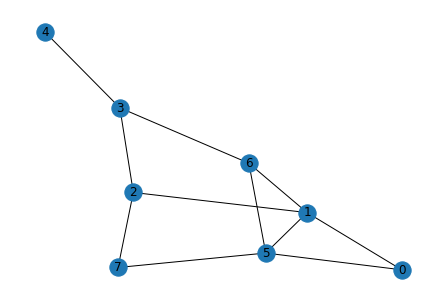

In [1]:
# code d'un graph non-orienté test
# + photos normal, eulérisé, cycle eulérien printé + plotté

from theoric.eulerize_directed import eulerize_directed
from theoric.utils import *
from theoric.utils_euler import find_eulerian_cycle_directed

nodes_number = 8

edges_directed, edges_undirected = random_connected_graph(nodes_number) #1

graph_undirected = Graph(nodes_number, edges_undirected, False) #2

nxgraph_undirected = undirected_graph_to_nxgraph(graph_undirected) #3

show_nxgraph(nxgraph_undirected) #4

A partir de ce graphe, il va falloir trouver le cycle eulérien. Pourquoi ? Parce que cela permet de passer par toutes les routes du graphe d’un seul coup sans passer des points plusieurs fois, en somme ça nous permet d’optimiser notre solution. Comment ? Nous allons assigner une balance à chaque node. +1 pour chaque edge sortant -1 pour chaque edge entrant. Exemple avec ce graphe simple :

![](images/balances.png)

Pour un graphe orienté par exemple, il faut que toutes les balances soient nulles. On parcourt donc le graphe et à chaque balance non nulle, on ajoute des edges entrants ou sortants selon nos besoins. La fonction Distance de la librairie OSMNX nous permet d’ajouter la longueur des rues (ou des edges) en mètres sur le graphe. 

![](images/balances_euler.png)

1) Une fois donc le graphe neutre récupéré, on va l'eulériser. C'est parfait car notre drone doit survoler toutes les rues. Le graphe qu'on eulérise est un de notre classe *Graph* (car nos fonctions s'appliquent à notre classe).

2) On convertit les edges eulérisés en un graphe.

3) On convertit de nouveau ce graphe en un graphe OSMNX pour pouvoir l'afficher et le sauvegarder.

3) On affiche et sauvegarde ensuite le graphe eulérisé. 

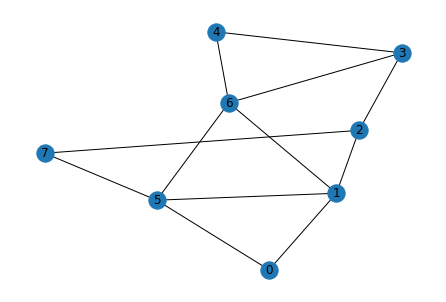

In [2]:
edges_undirected_eulerized = eulerize_undirected(nodes_number, graph_undirected.edges) #1

graph_undirected_eulerized = Graph(nodes_number, edges_undirected_eulerized) #2

nxgraph_undirected_eulerized = undirected_graph_to_nxgraph(graph_undirected_eulerized) #3

show_nxgraph(nxgraph_undirected_eulerized) #4

1) A partir de notre graph eulérisé on va donc chercher le cycle correspondant.

2) On print les numéros des nodes correspondant au parcours du cycle (ex : [0, 1, 2, 0] on commence du point 0, puis on va vers le point 1, puis le point 2, pour revenir au point 0).

3) Enfin on sauvegarde et affiche le graphe avec le cycle en couleur et l'ordre directement sur les nodes. Le premier edge du cycle est rouge puis devient petit à petit bleu en se rapprochant de la fin. Il suffit de suivre les numéros dans l'ordre afin de trouver le cycle.

eulerian_cycle_undirected:  [0, 1, 2, 3, 2, 7, 5, 1, 6, 3, 4, 6, 5]


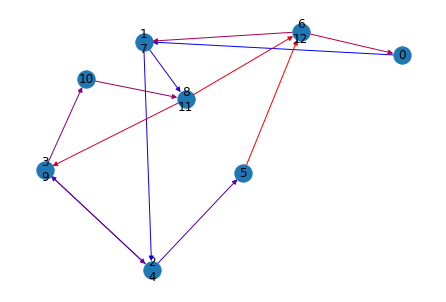

In [3]:
eulerian_cycle_undirected = find_eulerian_cycle_undirected(nodes_number, graph_undirected_eulerized.edges, 0) #1

print ("eulerian_cycle_undirected: ", eulerian_cycle_undirected) #2

show_cycle(nodes_number, eulerian_cycle_undirected) #3

#### 3.A.II Tests de Performances

Nous construisons une série de graphe connexes non-orientés avec des nombres de noeuds différents de manière aléatoire.
Nous appliquons à chacun de ces graphes notre algorithme d'**eulerisation de graphe non-orienté** puis nous analysons l'evolution de la durée d'exécution de l'eulerisation en fonction du nombre de noeuds.

Nous obtenons le graphique suivant : 

![](images/random_graphe_and_complexity/undir_euler.png)
*abscisses : nombre de noeuds / ordonnées : temps en secondes*

**Nous pouvons remarquer une complexité quadratique de l'algorithme**

A ces mêmes graphes désormais eulériens, nous appliquons notre algorithme de **recherche de cycle eulerien en graphe non-orienté**
Nous extrayons les données de la même manière et nous obtenons le graphique suivant : 

![](images/random_graphe_and_complexity/undir_cycle.png)
*abscisses : nombre de noeuds / ordonnées : temps en secondes*

**Nous remarquons une complexité proportionnelle à $n^{3}$**

(tous les tests de performances sont effectués dans le script utils_complexity_tests.py)

### 3.B Graphe Orienté (Parcours d'une déneigeuse)

#### 3.B.I Code

* *import eulerize_directed* :  pour pouvoir eulériser le graphe

* *import theoric.utils* : pour pouvoir créer un graphe aléatoire

* *import find_eulerian_cycle_directed* : pour pouvoir trouver le cycle eulérien

Sur cet example, on va créer un graphe aléatoire à 8 noeuds. 

On refait exactement la même chose que pour le parcours du drone sauf que cette fois-ci on va prendre un graphe orienté. Pourquoi ? Tout simplement car la déneigeuse doit suivre le sens de circulation et ne se contente pas de survoler les rues comme le drone.



Try counter: 1 (nodes_number: 8, edges_number: 13)


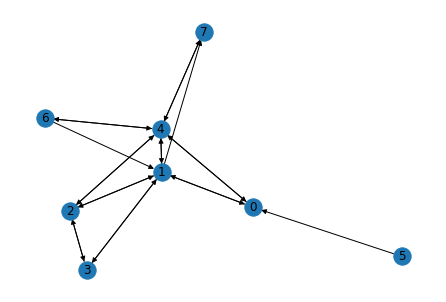

In [4]:
# code d'un graph orienté test
# + photos normal, eulérisé, cycle eulérien printé + plotté

from theoric.eulerize_directed import eulerize_directed
from theoric.utils import *
from theoric.utils_euler import find_eulerian_cycle_directed

nodes_number = 8

edges_directed, edges_undirected = random_connected_graph(nodes_number)

graph_directed = Graph(nodes_number, edges_directed)

nxgraph_directed = directed_graph_to_nxgraph(graph_directed)

show_nxgraph(nxgraph_directed)

Ici, mêmes étapes que pour le drone, on va eulériser le graphes afin de trouver plus tard le cycle eulérien. On affiche toujours le graphe en le sauvegardant au passage. 

3) On ajoute simplement une vérification afin d'être sûr que le graphe est bien eulérisé.

Successfully ? True


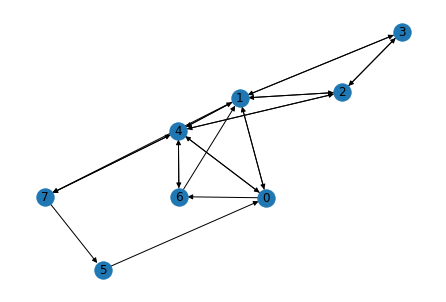

In [5]:
edges_directed_eulerized = eulerize_directed(nodes_number, graph_directed.edges)

graph_directed_eulerized = Graph(nodes_number, edges_directed_eulerized)

print ("Successfully ?", graph_directed_eulerized.is_eulerian()) #3

nxgraph_directed_eulerized = directed_graph_to_nxgraph(graph_directed_eulerized)

show_nxgraph(nxgraph_directed_eulerized)

Comme pour le drone, on cherche le cycle afin de parcourir toutes les edges. Les mêmes couleurs que pour le parcours du drone sont appliquées.

Le graphe affiché et sauvegardé à la fin du programme est le parcours final et optimisé de la déneigeuse.

eulerian_cycle_directed:  [0, 6, 4, 7, 5, 0, 4, 6, 1, 7, 4, 2, 4, 1, 4, 0, 1, 3, 2, 3, 1, 2, 1]


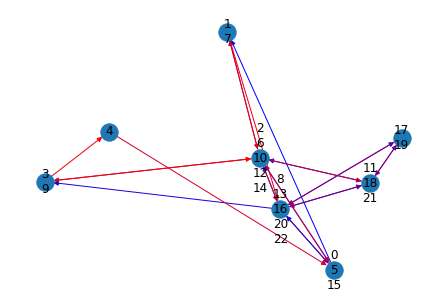

In [6]:
eulerian_cycle_directed = find_eulerian_cycle_directed(nodes_number, graph_directed_eulerized.edges, 0)

print ("eulerian_cycle_directed: ", eulerian_cycle_directed)

show_cycle(nodes_number, eulerian_cycle_directed)

#### 3.B.II Tests de Performances

De la même facon que pour les graphes non-orientés, nous construisons une série de graphes connexes orientés de manière aléatoire.

L'application à chacun d'entre eux de l'algorithme d'**eulerisation de graphe orienté** nous permet d'obtenir le graphique suivant :

![](images/random_graphe_and_complexity/dir_euler.png)
*abscisses : nombre de noeuds / ordonnées : temps en secondes*

**Comme pour les graphes non-orientés la complexité est quadratique**

Ensuite, l'application de l'algorithme de **recherche de cycle eulérien en graphe orienté** nous donne le graphique ci-dessous :

![](images/random_graphe_and_complexity/dir_cycle.png)
*abscisses : nombre de noeuds / ordonnées : temps en secondes*

**Malgré une variance supplémentaire dûe au temps très faible d'exécution, nous pouvons remarquer la complexité linéaire de l'algorithme**

(tous les tests de performances sont effectués dans le script utils_complexity_tests.py)

## **4 Partie Pratique**
Maintenant, prenons des cas concrets... On va enfin s'attaquer à la ville de Montréal.

### 4.A Diviser Pour Régner

Mais bon, comme il ne faut pas avoir les yeux plus gros que le ventre, on fera nos calculs et nos recherches de cycles sur chaque quartier et non sur la ville entière (et surtout pour ne pas faire exploser ce notebook!). Voici quelques exemples de vues aériennes de Google Maps de districts de Montréal, comparées avec les vues aériennes que nous récupérons avec la librairie OSMNX.


![](images/3_gr_vue.png)

### 4.B Exemple d'un Quartier

Prenons ici l'exemple d'un des districts de Montréal, Anjou.

1) *getData* va nous permettre de récupérer les données du district. Cette fonction va aussi nous permettre de récupérer la taille des rues (ou des edges). Cela nous permettra de calculer plus tard la distance à parcourir en kilomètres.

2) *process_directed* se charge de lancer toutes les fonctions qui correspondent au parcours de la ville par le drone. Cette fonction va récupérer le taux de neige sur chaque rue et va le transmettre aux déneigeurs.

3) *process_directed* va trouver le cycle eulérien pour permettre à la deneigeuse de trouver le chemin optimal pour déneiger le district en question.

4) On fixe ensuite le nombre de déneigeuse qui nous est fournit par la ville, ici on met 140 car on ne parcours qu'un district, mais lorsque l'on parcourera tous les districts, on mettra 2200 et elles se répartiront automatiquement entre tous les districts de Montréal. 

5) On appelle ensuite la fonction d'optimisation, *process_directed_data*, qui répartit justement les déneigeuses entre les districts en fonction du km à parcourir et du taux de neige à déneiger et trouve le cycle eulérien pour chacune d'elles. 

Processing Anjou (undirected)


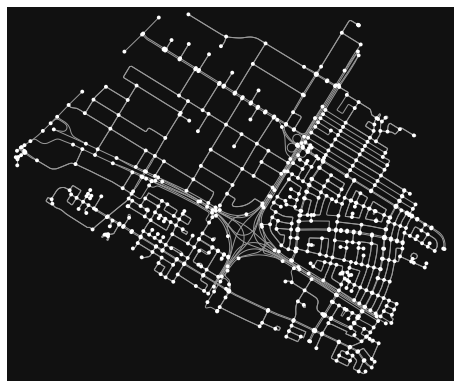

<Figure size 432x288 with 0 Axes>

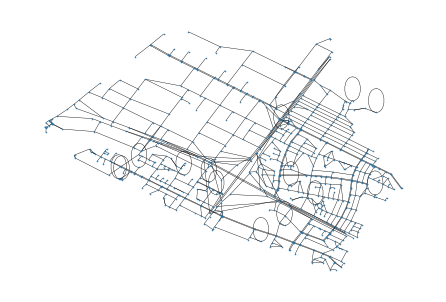

edges : 1115  nodes : 728  and fraction is : 1.5315934065934067
Adding snow


<Figure size 432x288 with 0 Axes>

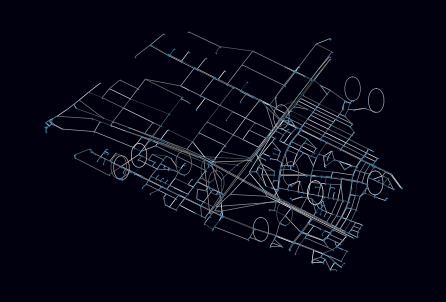

Removing unsnowy non bridges roads
Is the graph Eulerian: False / Edges count: 1115
Total street length 151.91km
Eulerized 1115 edges to 1366
Is the graph Eulerian: True / Edges count: 1366
Finding a cycle
Plotting the cycle


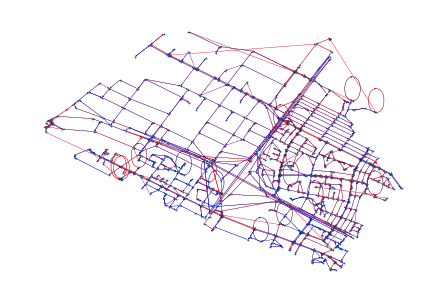

Processing Anjou (directed)


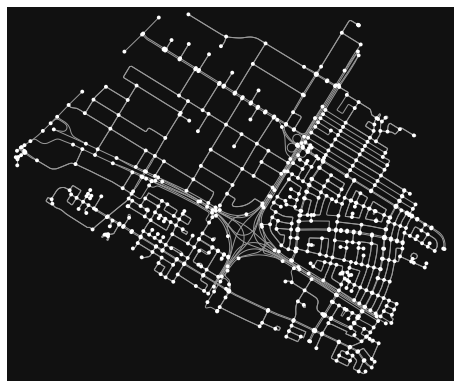

<Figure size 432x288 with 0 Axes>

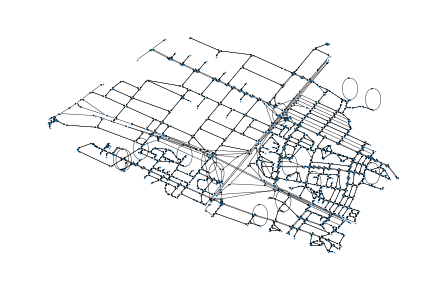

728 1690
Adding the snow and lenghts the drone saw


<Figure size 432x288 with 0 Axes>

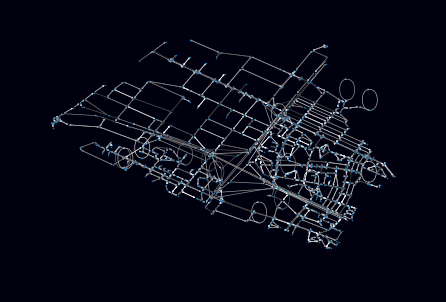

Is the graph Eulerian: False / Edges count: 1690
Eulerized 1690 edges to 1754
Is the graph Eulerian: True / Edges count: 1754
Finding a cycle
Plotting the cycle


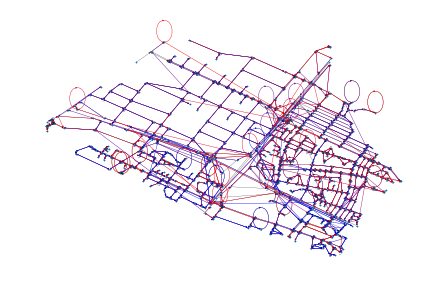

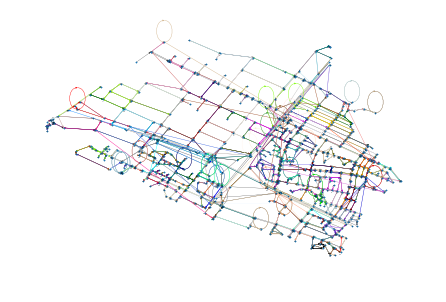

distance : 202.88km

snow : 893.5m3

fuel spent : 243.46L

fuel cost : 421.18$

time : 0:3:28$

plows : 140


In [7]:
# code de example for one pour Anjou

from practical.data import *
import matplotlib

data = getData("Anjou")                                                     #1

snow = process_undirected("Anjou", data, True)                              #2

name, totalweight, cycleData = process_directed("Anjou", data, snow, True)  #3
snow_plows_count = 140 # example                                             4
process_directed_data(name, *cycleData, snow_plows_count, True)             #5

#### 4.B.I Process Undirected

 En première partie nous allons donc nous occuper du trajet du drone. Pour cela nous considérons un graphe non orienté car le drone n’a pas besoin de suivre le sens de la circulation (et que c’est plus simple !). Nous sommes partis du principe que notre graphe est connexe. En effet, si toutes les rues d’une ville ne sont pas reliées ce n’est pas une ville… Nous parcourons donc le graphe avec le drone. Nous envoyons un drone survoler les rues afin de savoir combien de centimètres de neige il y a sur chaque rue. Cela va nous servir pour définir les rues prioritaires au déneigement. Nous devons ajouter le paramètre « drive » à la librairie OSMNX car la vitesse de déplacement du drone ou de la déneigeuse se rapprochent plus de celle d’une voiture que de celle d’un passant. 
 

 1) On s'assure que le dossier *imgs* et le dossier du distrcit en questions sont bien là, sinon on les crée. Ensuite on recherche la vue aérienne à partir de la librairie OSMNX comme sur les images plus haut grâce à la fonction *plot_data*. On affiche et on sauvegarde cette vue aérienne (Anjou_view.png)

 2) On convertit cette vue aérienne en un graphe, et on sauvegarde ce gaphe (anjou_raw_undirected.png).

 3) On le convertit ensuite dans un graphe de notre classe *Graph*, et vient le moment crucial de récupérer les informations de neige. Pour inventer les valeurs de taux de neige sur chaque rue, on applique une courbe Gaussienne avec 3.189 d'écart type et 8.75 de moyenne. Cela nous permet d'avoir une chance de 95% d'avoir de la neige (anjou_undirected_snow.png).
 
 
 4) Ensuite, le drone élimine automatiquement les rues qui ont un taux de neige inférieur à 2.5cm et supérieur à 15cm.

 5) On eulérise le graph comme expliqué dans la partie théorique.
 
 6) Et enfin on trouve le cycle pour que le drone puisse parcourir toutes les rues (anjou_undirected_cycle.png).

 A la fin de notre fonction de drone, on retourne l'attribu *snow* qui correspond aux routes déneigeables de Montreal.

In [8]:
# code de process undirected
# plot and process the data in a undirected way
def process_undirected(name, data, show=False):
    if not(os.path.isdir("imgs")):
        os.mkdir("imgs")
    if not(os.path.isdir("imgs/" + name)):
        os.mkdir("imgs/" + name)
    print("Processing " + name + " (undirected)")                                                                 

    plot_data(name, data, show)                                                                                     # 1

    # convert it to a nxgraph
    undirectedNxGraph = extract_undirected_graph(data)

    # get the points' positions
    position = get_position(undirectedNxGraph)

    # plot the nx graph
    plot_graph(name, "raw_undirected", undirectedNxGraph, position, show)                                          # 2

    # convert it to our graph class, keeping the old node IDs
    G, G_nodes = undirected_nxgraph_to_graph(undirectedNxGraph)
    
    print("edges :", len(G.edges), " nodes :", len(G_nodes), " and fraction is :", len(G.edges) / len(G_nodes))

    # snow height system

    print("Adding snow")
    G.add_random_snow() # according to a gaussian curve distribution of the snow height
    plot_snow(name, "undirected", G, undirectedNxGraph, position, show)                                             # 3
    print("Removing unsnowy non bridges roads")
    G.remove_unsnowy() # remove unsnowy and not "bridges" roads                                                     # 4

    # end snow
    print("Is the graph Eulerian:", G.is_eulerian(), "/", "Edges count:", len(G.edges))
    # eulerize the graph

    weight = 0
    for edge in G.edges:
        weight += edge[2]
    print("Total street length", str(round(weight / 1000.0, 2)) + "km")
    G.eulerize()

    print("Is the graph Eulerian:", G.is_eulerian(), "/", "Edges count:", len(G.edges))                            # 5

    # find an eulerian cycle in a directed graph
    print("Finding a cycle")
    cycle_undirected = find_eulerian_cycle_undirected(G.n, G.edges, 0)

    # convert the node list to a directed graph (cycle graph)
    G_cycle_undirected = directed_graph_from_cycle(G.n, cycle_undirected)

    print("Plotting the cycle")
    # plot the cycle graph
    plot_cycle(name, "undirected_cycle", undirectedNxGraph, cycle_undirected, G_cycle_undirected, G_nodes, show)  # 6

    # return the snow seen by the drone + street lengths
    return G.snow

#### 4.B.II Process Directed
Une fois que le parcours du graphe par le drone est acté, nous pouvons passer au parcours de la déneigeuse. Celle-ci doit en revanche suivre les sens de circulation, nous allons donc avoir besoin d’un graphe orienté.


 1) Comme pour le drone, on s'assure que le dossier *imgs* et le dossier du distrcit en questions sont bien là, sinon on les crée. Ensuite on recherche la vue aérienne à partir de la librairie OSMNX comme sur les images plus haut grâce à la fonction *plot_data*. On affiche et on sauvegarde cette vue aérienne (Anjou_view.png)

 2) On convertit cette vue aérienne en un graphe, et on sauvegarde ce gaphe (anjou_raw_directed.png).

 3) On le convertit ensuite dans un graphe de notre classe *Graph* pour pouvoir lui ajouter les informations récupérées par le drone. On sait à présent quelles rues on va devoir déneiger (anjou_directed_snow.png).

 4) On eulérise le graph comme expliqué précédemment.

 5) Et enfin on trouve le cycle pour que la déneigeuse puisse parcourir toutes les rues (anjou_directed_cycle.png).

 6) A la fin de la fonction, cette fois on renvoie : 
 * le nom du district
 
 * le nombre total de kilomètres à parcourir (en ne prenant pas en compte les rues < 2.5cm  et > 15cm de neige) afin de pouvoir calculer le nombre de déneigeuses nécessaires 
 
 * les informations (data) de notre graphe, pour pouvoir plus tard recalculer le cycle eulérien en fonction du nombre de déneigeuses attribuées au district.

In [9]:
# code de process directed
# plot and process the data in a directed way
def process_directed(name, data, snow, show=False):
    if not(os.path.isdir("imgs")):
        os.mkdir("imgs")
    if not(os.path.isdir("imgs/" + name)):
        os.mkdir("imgs/" + name)
    print("Processing " + name + " (directed)")
    
    plot_data(name, data, show)                                                                                 # 1

    # convert it to a nxgraph
    directedNxGraph = extract_directed_graph(data)

    # get the points' positions
    position = get_position(directedNxGraph)

    # plot the nx graph
    plot_graph(name, "raw_directed", directedNxGraph, position, show)                                            # 2

    # convert it to our graph class, keeping the old node IDs
    G, G_nodes = directed_nxgraph_to_graph(directedNxGraph)

    l_1 = G.n
    l_2 = 0
    for edge in G.edges:
        l_2 += 1
    print(l_1, l_2)

    # snow height + weights system

    print("Adding the snow and lenghts the drone saw")
    G.add_snow_and_weights(G.edges, snow) # according to a gaussian curve distribution of the snow height
    plot_snow(name, "directed", G, directedNxGraph, position, show)                                             # 3

    # end snow
    print("Is the graph Eulerian:", G.is_eulerian(), "/", "Edges count:", len(G.edges))
    # eulerize the graph
    G.eulerize()                                                                                                # 4

    print("Is the graph Eulerian:", G.is_eulerian(), "/", "Edges count:", len(G.edges))

    # find an eulerian cycle in a directed graph
    print("Finding a cycle")
    cycle_directed = find_eulerian_cycle_directed(G.n, G.edges, 0)

    # convert the node list to a directed graph (cycle graph)
    G_cycle_directed = directed_graph_from_cycle(G.n, cycle_directed)

    print("Plotting the cycle")
    # plot the cycle graph
    plot_cycle(name, "directed_cycle", directedNxGraph, cycle_directed, G_cycle_directed, G_nodes, show)        # 5
    total_distance_km = 0

    for i in range(1, len(cycle_directed)):
        a = cycle_directed[i - 1]
        b = cycle_directed[i]
        key = (a, b)
        n_key = find_key(snow, key)
        weight = 0
        if n_key != None:
            weight = n_key[2]
        total_distance_km += (weight / 1000)

    data = [
        directedNxGraph,
        cycle_directed,
        G_cycle_directed,
        G_nodes,
        G,
    ]

    return name, total_distance_km, data                                                                           # 6

#### 4.B.III Process Directed Data
Pour cette partie d'optimisation, il nous faut attendre toutes les tailles de districts, afin de pouvoir répartir équitablement toutes les déneigeuses fournies par la ville de Montréal. Sur notre exemple ici, il n'y a qu'un district donc c'est assez rapide à attendre !

Dans chaque district, on part du principe qu'il y a des "cabanes à déneigeuses", pour stocker les déneigeuses et surtout pour qu'elles ne partent pas toutes du même point.

* *plot_cycle* va trouver dans le graphe un cycle eulérien pour chaque déneigeuse attribuée au district. Cette fonction affiche et sauvegarde le graphe trouvé. Sur le graphe, chaque parcours de déneigeuse est signalé par un couleur. S'il y a 400 déneigeuses affectées à un district, il y aura alors 400 couleurs différentes.

* *save_data* sauvegarde les données d'un districts (anjou_data.txt), soit :
    * la distance totale enneigée en km,
    * le volume de neige en m3,
    * le carburant dépensé en L,
    * le coût du carburant dépensé en $,
    * le temps mis pour déneiger avec toutes les déneigeuses,
    * le nombre de déneigeuses utilisées.


In [10]:
# code de process directed data
def process_directed_data(name, directedNxGraph, cycle_directed, G_cycle_directed, G_nodes, G, snow_plow_per_district, show=False):
    plot_cycle_split(name, "directed_cycle_split", directedNxGraph, cycle_directed, G_cycle_directed, G_nodes, snow_plow_per_district, show)
    save_data(name, cycle_directed, G.snow, snow_plow_per_district, show)

#### 4.B.IV Save Data
Un aperçu plus détaillé de la fonction *save_data* décrite dans la section *4.B.III Process Directed Data*.

In [11]:
# save the calculated data in a file
def save_data(name, cycle, snow, plows, show=False):
    total_snow_volume = 0
    total_distance_km = 0

    # avg size of the roads
    avg_road_width = 5.0
    # avg fuel consumption per km in h for deneigeuses
    avg_fuel_consumption_per_h = 30.0
    # avg fuel cost in $
    avg_fuel_cost = 1.730
    # avg deneigeuse speed in km/h
    avg_speed = 25.0

    for i in range(1, len(cycle)):
        a = cycle[i - 1]
        b = cycle[i]
        key = (a, b)
        n_key = find_key(snow, key)
        weight = 0
        s = 0
        if n_key != None:
            weight = n_key[2]
            if n_key[0] != -1:
                s = snow[n_key]
        total_snow_volume += weight * (s / 100) * avg_road_width
        total_distance_km += (weight / 1000)

    total_snow_volume /= 100
    t = (total_distance_km / avg_speed)
    s = avg_fuel_consumption_per_h * t

    lines = [
        "distance : " + str(round(total_distance_km, 2)) + "km\n",
        "snow : " + str(round(total_snow_volume, 2)) + "m3\n",
        "fuel spent : " + str(round(s, 2)) + "L\n",
        "fuel cost : " + str(round(s * avg_fuel_cost, 2)) + "$\n",
        "time : " + hours_to_HMS(t / plows) + "$\n",
        "plows : " + str(plows)
        ]
    
    if not(show):
        with open("imgs/" + name + "/" + name + "_data.txt", 'w') as f:
            f.writelines(lines)
    else:
        for line in lines:
            print(line)

### 4.D Déneigement de Montréal
Voici la fonction qui appelle chaque districts un par un afin de déneiger entièrement Montréal. Cette fonction appelle toutes les autres décrites plus haut dans le notebook. Le programme est en commentaire afin de ne pas créer une bombe avec ce notebook.

In [12]:
from practical.data import *
from practical.districts import *

snow_plows = 2200

dataCollect = []

def subprocess(district):
    data = getData(district)

    snow = process_undirected(district, data)
    dataCollect.append(process_directed(district, data, snow))
"""
for dis in districts:
    subprocess(dis)

total = 0
for data in dataCollect:
    name, totalweight, cycleData = data
    total += totalweight

for data in dataCollect:
    name, totalweight, cycleData = data
    snow_plows_count = round((totalweight / total) * snow_plows)
    process_directed_data(name, *cycleData, snow_plows_count)

print("Finished")"""

'\nfor dis in districts:\n    subprocess(dis)\n\ntotal = 0\nfor data in dataCollect:\n    name, totalweight, cycleData = data\n    total += totalweight\n\nfor data in dataCollect:\n    name, totalweight, cycleData = data\n    snow_plows_count = round((totalweight / total) * snow_plows)\n    process_directed_data(name, *cycleData, snow_plows_count)\n\nprint("Finished")'

### 4.E Améliorations possibles

On peut voir que notre technique pour optimiser le déneigement de Montréal fonctionne, voici quelques exemples de données de temps et de fuel dépensé pour les districts affichés plus haut dans le notebook.

![](images/les_txt.png)


Voici quelques améliorations possibles de notre solution :
- sauvegarder le graph en json, avec une technique multithreadée
- sauvegarder une image par déneigeuse par district (au lieu d'un graphe avec tous les cycles colorés)
- sauvegarder les osmnx data dans un fichier au lieu de faire une requête à chaque fois
- prendre en compte la largeur de la route pour la répartition et la possibilité de couper une route en plusieurs morceaux si trop large
- prendre en compte le temps que la déneigeuse arrive jusqu'au point de départ de son cycle (sans cabane à deneigeuse)

## **5 Conclusion**


Nos algorithmes d'optimisation du déneigement de Montréal tournent en 33min et en 12min sans enregistrer les images. C'est un assez beau résultat, imaginez vous le chef des déneigeuses. Vous vous levez le matin, vous voyez qu'il y a de la neige par la fenêtre. Vous lancez l'algo sur votre ordinateur et le drone s'envole. Pendant ce temps vous prenez votre café, vos tartines, vous prenez une bonne douche chaude, mettez vos plus belles bottes de neiges et avant même que vous soyez prêt à partir l'optimisation est déjà faite et vous savez quel district affecter à quelles déneigeuses. Elle est pas belle la vie ?


Quant aux passages des déneigeuses, on peut clairement voir que le coût est moindre lorsque l’on a plusieurs déneigeuses par quartier, ce qui paraît logique. La déneigeuse seule met beaucoup trop de temps et le Soleil irait bien plus vite pour faire disparaître toute cette neige. Il faudrait alors déneiger de nuit, et nous ne sommes pas sûrs que les déneigeurs québécois acceptent ces dures conditions de travail.


Pour arriver à ce travail final, nous sommes passés par plusieurs étapes et plusieurs cul de sac... Voici un petit tableau récapitulatif des techniques que nous avons testées, des résultats que nous avons obtenus grâce à ces dernières mais surtout de leurs limites.

![alt text](images/tableau.png "Tableau récapitulatif de nos essais")